In [1]:
#Umut Ekin Gezer 03716498

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('simulation_time_data.csv')

#Create a columns wall_clocktime which is difference between end_time and start_time

df["wall_clocktime"]=df["end_time"]-df["start_time"]

#We do not need anymore start_time and end_time column

del df["start_time"]
del df["end_time"]

In [2]:
df.head()

,simulation_id,finished,duration,sha,simulation_behavior_name,simulation_builder_name,simulation_behavior_params,flowgen_id,flowgen_name,seed,...,cpgen_name,cpgen_parameter,topology_id,topology_name,topology_parameter,fk_decorated_topology_id,algorithm_id,algorithm_name,algorithm_parameter,wall_clocktime
0,1,1,200000000,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,1,RandomWithConnectionProbabilityFlowGeneratorCo...,0,...,HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",1,RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",NaN,1,RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",8715
1,2,1,200000000,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,2,RandomWithConnectionProbabilityFlowGeneratorCo...,1,...,HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",1,RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",NaN,1,RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",7171
2,4,1,200000000,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,4,RandomWithConnectionProbabilityFlowGeneratorCo...,0,...,HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",1,RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",NaN,1,RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",25767
3,5,1,200000000,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,5,RandomWithConnectionProbabilityFlowGeneratorCo...,1,...,HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",1,RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",NaN,1,RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",21978
4,6,1,200000000,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,6,RandomWithConnectionProbabilityFlowGeneratorCo...,2,...,HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",1,RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",NaN,1,RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",23805


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   simulation_id               781 non-null    int64  
 1   finished                    781 non-null    int64  
 2   duration                    781 non-null    int64  
 3   sha                         781 non-null    object 
 4   simulation_behavior_name    781 non-null    object 
 5   simulation_builder_name     781 non-null    object 
 6   simulation_behavior_params  781 non-null    object 
 7   flowgen_id                  781 non-null    int64  
 8   flowgen_name                781 non-null    object 
 9   seed                        781 non-null    int64  
 10  number_flows                256 non-null    float64
 11  nodes                       0 non-null      float64
 12  bidirectional               781 non-null    int64  
 13  volume_per_node             525 non

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as nodes and fk_decorated_topology_id ). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove Id and the features with 30% or less NaN values.

In [4]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: nodes, fk_decorated_topology_id, 



Summary of wall_clocktime values in terms of mean, standard deviation, percentiles,minimum and maximum values.

In [5]:

print(df['wall_clocktime'].describe(include=[np.number]))

count    7.810000e+02
mean     8.201927e+04
std      1.686397e+05
min      1.920000e+02
25%      7.556000e+03
50%      2.561700e+04
75%      8.027500e+04
max      1.509267e+06
Name: wall_clocktime, dtype: float64


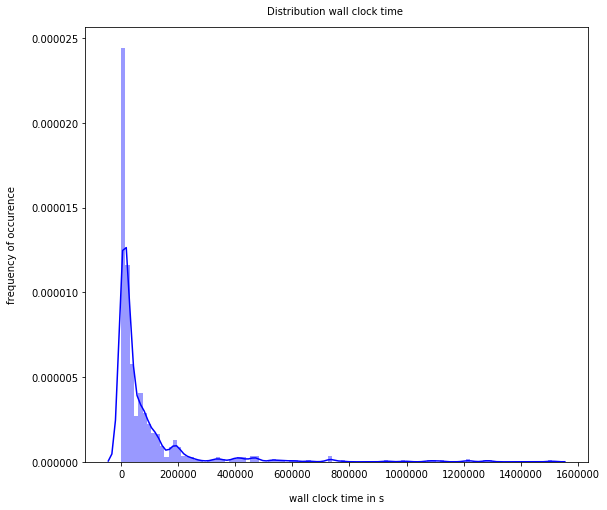

In [6]:
import seaborn as sns

plt.figure(figsize=(9, 8))
sns.distplot(df['wall_clocktime'], color='blue', bins=100, hist_kws={'alpha': 0.4})
plt.title("Distribution wall clock time ", y=1.015, fontsize=10)
plt.xlabel("wall clock time in s", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.savefig('Distribution wall clock time.png')
plt.show()

We notice that the wall_clocktime data is right skewed and some outliers between 600.000s and 800.000s

Now, in order to find significant factors of wall clock time, I will conduct correation test, thus I extract the columns which have categorical obeject values. Furthermore, id and name columns refer the same type of data. For instance, algorithm_id and algorithm_name refer same parameter.  

In [7]:
print(list(set(df.dtypes.tolist())))

[dtype('int64'), dtype('O'), dtype('float64')]


I will keep int and float types of data for correlation test

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,simulation_id,finished,duration,flowgen_id,seed,number_flows,bidirectional,volume_per_node,atgen_id,fvgen_id,cpgen_id,topology_id,algorithm_id,wall_clocktime
0,1,1,200000000,1,0,4070.0,0,NaN,1.0,1,1.0,1,1,8715
1,2,1,200000000,2,1,4070.0,0,NaN,1.0,1,1.0,1,1,7171
2,4,1,200000000,4,0,10176.0,0,NaN,1.0,1,1.0,1,1,25767
3,5,1,200000000,5,1,10176.0,0,NaN,1.0,1,1.0,1,1,21978
4,6,1,200000000,6,2,10176.0,0,NaN,1.0,1,1.0,1,1,23805


In [9]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   simulation_id    781 non-null    int64  
 1   finished         781 non-null    int64  
 2   duration         781 non-null    int64  
 3   flowgen_id       781 non-null    int64  
 4   seed             781 non-null    int64  
 5   number_flows     256 non-null    float64
 6   bidirectional    781 non-null    int64  
 7   volume_per_node  525 non-null    float64
 8   atgen_id         256 non-null    float64
 9   fvgen_id         781 non-null    int64  
 10  cpgen_id         255 non-null    float64
 11  topology_id      781 non-null    int64  
 12  algorithm_id     781 non-null    int64  
 13  wall_clocktime   781 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 85.5 KB


We have now 14 columns which have int or float type of data


I plot histogram of remaining 14 columns to visualize them

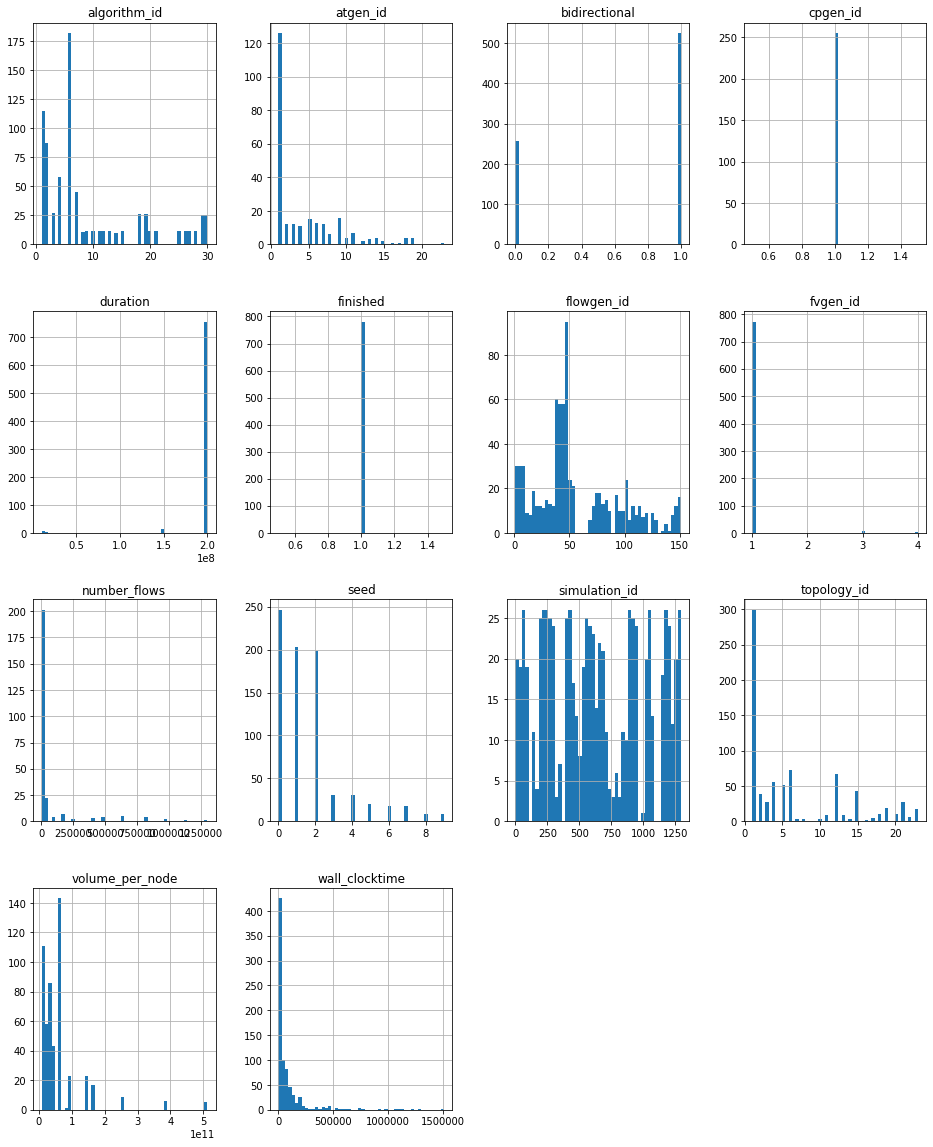

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10)
plt.savefig('Numerical_data.png')
plt.show()

There are only one type of cpgen_id,finished,fvgen_id. They have no influences on our analysis. We could have exctracted them, but the correlation test will detect them. Thus extraction of those parameters is not compulsory

In [12]:
df_num_corr = df_num.corr()['wall_clocktime'][:-1] # -1 because the latest row is wall_clocktime

significant_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with wall_clocktime:\n{}".format(len(significant_features_list), significant_features_list))

There is 2 strongly correlated values with wall_clocktime:
number_flows    0.760312
atgen_id        0.517418
Name: wall_clocktime, dtype: float64


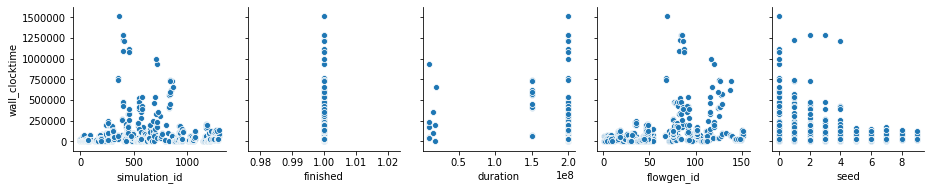

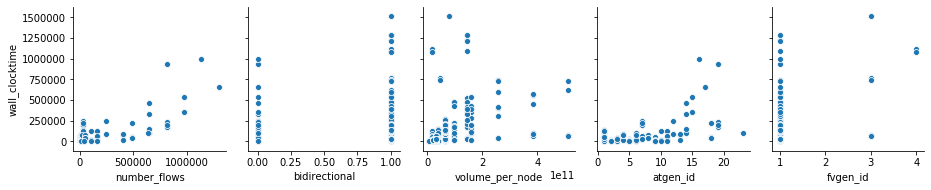

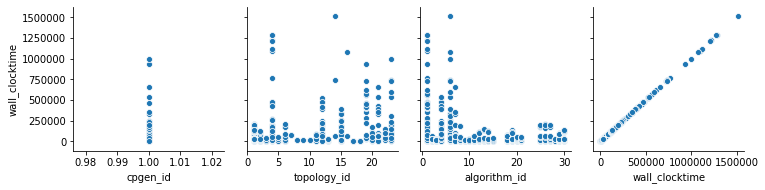

In [13]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['wall_clocktime'])

plt.savefig('Numerical_data_correlation.png')
plt.show()    

In [14]:
print(df_num_corr)

simulation_id     -0.016517
finished                NaN
duration          -0.204183
flowgen_id         0.305055
seed              -0.030265
number_flows       0.760312
bidirectional      0.120159
volume_per_node    0.448559
atgen_id           0.517418
fvgen_id           0.380412
cpgen_id                NaN
topology_id        0.262555
algorithm_id      -0.150042
Name: wall_clocktime, dtype: float64


In [15]:
In numerical data number of flows and arrival time generator id parameters have significant on wall clock time.
Their absolute correlation values with wall clock time data are greater than threshold value 0.5.
We can also detect from plot above the correlations.
Note: Number of flow is numerical data, increase on data has affects on wall_clock_time but atgen_id seems to integer categorical varible. Nevertheless ve arrival time generator has remerkable effect on wall clock time 

SyntaxError: invalid syntax (<ipython-input-15-0498aeb8a346>, line 1)

# ANOVA TEST

Now, I will check object data for sigficance analysis

In [16]:

list(df.select_dtypes(include = ['O']))


['sha',
 'simulation_behavior_name',
 'simulation_builder_name',
 'simulation_behavior_params',
 'flowgen_name',
 'flowgen_parameter',
 'atgen_name',
 'atgen_parameter',
 'fvgen_name',
 'fvgen_parameter',
 'cpgen_name',
 'cpgen_parameter',
 'topology_name',
 'topology_parameter',
 'algorithm_name',
 'algorithm_parameter']

In [17]:
object_list=['sha',
 'simulation_behavior_name',
 'simulation_builder_name',
 'simulation_behavior_params',
 'flowgen_name',
 'flowgen_parameter',
 'atgen_name',
 'atgen_parameter',
 'fvgen_name',
 'fvgen_parameter',
 'cpgen_name',
 'cpgen_parameter',
 'topology_name',
 'topology_parameter',
 'algorithm_name',
 'algorithm_parameter',"wall_clocktime"]

#I add "wall_clocktime" as target feature





In [18]:
df_object=df[object_list]

In [19]:
df_object

,sha,simulation_behavior_name,simulation_builder_name,simulation_behavior_params,flowgen_name,flowgen_parameter,atgen_name,atgen_parameter,fvgen_name,fvgen_parameter,cpgen_name,cpgen_parameter,topology_name,topology_parameter,algorithm_name,algorithm_parameter,wall_clocktime
0,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,RandomWithConnectionProbabilityFlowGeneratorCo...,NaN,PeriodicArrivalTimeGeneratorConfiguration,"{""period"": 0}",CdfBasedFlowVolumeGeneratorConfiguration,"{""values"": [800, 1440, 2000, 4480, 7200, 8800,...",HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",8715
1,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,RandomWithConnectionProbabilityFlowGeneratorCo...,NaN,PeriodicArrivalTimeGeneratorConfiguration,"{""period"": 0}",CdfBasedFlowVolumeGeneratorConfiguration,"{""values"": [800, 1440, 2000, 4480, 7200, 8800,...",HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",7171
2,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,RandomWithConnectionProbabilityFlowGeneratorCo...,NaN,PeriodicArrivalTimeGeneratorConfiguration,"{""period"": 0}",CdfBasedFlowVolumeGeneratorConfiguration,"{""values"": [800, 1440, 2000, 4480, 7200, 8800,...",HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",25767
3,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,RandomWithConnectionProbabilityFlowGeneratorCo...,NaN,PeriodicArrivalTimeGeneratorConfiguration,"{""period"": 0}",CdfBasedFlowVolumeGeneratorConfiguration,"{""values"": [800, 1440, 2000, 4480, 7200, 8800,...",HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",21978
4,e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,RandomWithConnectionProbabilityFlowGeneratorCo...,NaN,PeriodicArrivalTimeGeneratorConfiguration,"{""period"": 0}",CdfBasedFlowVolumeGeneratorConfiguration,"{""values"": [800, 1440, 2000, 4480, 7200, 8800,...",HostLevelTorConnectionPairUniformGeneratorConf...,"{""seed"": null, ""tor_switch_identifier"": ""TorSw...",RotorNetTopologyConfiguration,"{""nr_hosts_per_rack"": 1, ""nr_racks"": 64, ""tor_...",RotorNetTorToTorTwoHopAlgorithmWithFullRateAll...,"{""rate_limit_factor"": 1}",23805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,540955382803cfec0a74c0b7d651fd72366bbdf1,SimulationBehaviorWithDatabaseCheckFactory,InitialEnvStateAllFlowsSimulationWithEventInse...,{'decorated_behavior_name': 'RotornetSimulatio...,SourceBySourceRandomFlowGeneratorConfiguration,"{""arrival_time"": 0.000000}",NaN,NaN,CdfBasedFl

In [22]:
df_object[object_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   sha                         781 non-null    object
 1   simulation_behavior_name    781 non-null    object
 2   simulation_builder_name     781 non-null    object
 3   simulation_behavior_params  781 non-null    object
 4   flowgen_name                781 non-null    object
 5   flowgen_parameter           525 non-null    object
 6   atgen_name                  256 non-null    object
 7   atgen_parameter             256 non-null    object
 8   fvgen_name                  781 non-null    object
 9   fvgen_parameter             781 non-null    object
 10  cpgen_name                  255 non-null    object
 11  cpgen_parameter             255 non-null    object
 12  topology_name               781 non-null    object
 13  topology_parameter          781 non-null    object

In [23]:
#Lets check values in object columns:

for column in df_object.columns:
    print(df_object[column].value_counts().sort_index(ascending=False))
    

f95a8a05042037fe3ba9a9bb5d4cf12fcc45d2e2    102
f1a2f9993802f49cf92f537a2ea43a794d2d15ee     10
e9b87c42ac6e941fb7ed98db649d600a860aaa46     13
e976cec0dcaa7a6f7f731891dfc68a5e038bb6fa     84
d050f9fad4aeeaa892126a1065df6feb79041978     75
baf3d25fc1729ab354cc83e16824f99b112f3706     36
adc71ff496e244f6ad2bb294017c9deadd4e704d     31
8f4fb88ab098178a628684bf473f1dd45e33d222     12
8c883888c37017b366362818f9636dfda246c095     15
6fc6841f4f9594a1b23ba7cec51782d0720c090a      6
6f8c52d3dd06d45e6221eb00080131ca42d33c98     32
554446b94476d30e0db5837be7d3174d1a5a7e82      7
540955382803cfec0a74c0b7d651fd72366bbdf1     90
43e5549b409c8058ae97eedc47ba898ba0f6b957     60
3dfacf06c96f644c17d252807cbe4cfa5a271d82     59
311dadad9b28bfcc8eb4360c14f3f6c1c65205bd      1
28c0f415357c0455721ea4ca5798aac19750e2e3     15
1b1605791e0fcf2ad4d703870571dce3d1a62326    101
097ae5e9b92c42929d5992cef1ed4d31ddece3a2      3
0494ef8a8afc8a4342dffe411df4874f8b1082ef     29
Name: sha, dtype: int64
SimulationBehavi

In [26]:
from scipy.stats import f_oneway

for column in df_object.columns :
    CategoryGroupLists=df_object.groupby(column)["wall_clocktime"].apply(list)
    AnovaResults_2 = f_oneway(*CategoryGroupLists)
    
    if AnovaResults_2[1] <= 0.05 :
        print(column,'has P-Value for Anova is: ', AnovaResults_2[1])
        print(column,"has significant influences on wall_clocktime")
        
        print("***************************************************************")
    

sha has P-Value for Anova is:  1.8413374646794444e-44
sha has significant influences on wall_clocktime
***************************************************************
***************************************************************
***************************************************************
simulation_behavior_params has P-Value for Anova is:  0.004730598581388231
simulation_behavior_params has significant influences on wall_clocktime
***************************************************************
flowgen_name has P-Value for Anova is:  0.0007659496698461354
flowgen_name has significant influences on wall_clocktime
***************************************************************
***************************************************************
atgen_name has P-Value for Anova is:  9.826331616721667e-05
atgen_name has significant influences on wall_clocktime
***************************************************************
atgen_parameter has P-Value for Anova is:  4.7591476179134263e-60


/Users/umutekingezer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3347: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn


Significant object columns "sha","simulation_behavior_params","flowgen_name","atgen_name","atgen_parameter","fvgen_parameter","topology_parameter","algorithm_name","algorithm_parameter"

In [27]:
for column in df_num.columns :
    GroupLists=df_num.groupby(column)["wall_clocktime"].apply(list)
    AnovaResults_2 = f_oneway(*GroupLists)
    
    if AnovaResults_2[1] <= 0.05 :
        print(column,'has P-Value for Anova is: ', AnovaResults_2[1])
        print(column,"has significant influences on wall_clocktime")
    
        print("*-*-*-*-*-*-*-*-*-*-*-*-*-*--*-*-*-*-*-*-*-*-*-*-")

duration has P-Value for Anova is:  1.7653403335280083e-19
duration has significant influences on wall_clocktime
*-*-*-*-*-*-*-*-*-*-*-*-*-*--*-*-*-*-*-*-*-*-*-*-
flowgen_id has P-Value for Anova is:  6.533021339814841e-99
flowgen_id has significant influences on wall_clocktime
*-*-*-*-*-*-*-*-*-*-*-*-*-*--*-*-*-*-*-*-*-*-*-*-
number_flows has P-Value for Anova is:  3.8749495543111617e-62
number_flows has significant influences on wall_clocktime
*-*-*-*-*-*-*-*-*-*-*-*-*-*--*-*-*-*-*-*-*-*-*-*-
bidirectional has P-Value for Anova is:  0.0007659496698461354
bidirectional has significant influences on wall_clocktime
*-*-*-*-*-*-*-*-*-*-*-*-*-*--*-*-*-*-*-*-*-*-*-*-
volume_per_node has P-Value for Anova is:  8.903328365687811e-72
volume_per_node has significant influences on wall_clocktime
*-*-*-*-*-*-*-*-*-*-*-*-*-*--*-*-*-*-*-*-*-*-*-*-
atgen_id has P-Value for Anova is:  4.7591476179134263e-60
atgen_id has significant influences on wall_clocktime
*-*-*-*-*-*-*-*-*-*-*-*-*-*--*-*-*-*-*-

/Users/umutekingezer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3348: RuntimeWarning: divide by zero encountered in double_scalars
  msw = sswn / dfwn


For numerical features duration "flowgen_id" "number_flows" "bidirectional" "volume_per_node" "atgen_id" "fvgen_id" "topology_id" "algorithm_id" have significant influences on wall_clocktime